# STA 208: Homework 2 (Do not distribute)

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

## My Answers to Exercise 1

### * Exercise 1.1

If we assign $\lambda = e^{\beta^\top x}$ and plug it in to the $p(y|\lambda)$ we have the possion regression with with the probability mass function of : 
$$
p(y|\beta,x) = \frac{e^{y \beta^\top x } e^{-e^{\beta^\top x}}}{y!}
$$

We use the Likelihood function to define the loss as $L(\beta|x,y)$:
$$
L(\beta|x,y) = \prod_i p(y_i|\beta,x_i) = \prod_i \frac{e^{y_i\beta^\top x_i} e^{-e^{\beta^\top x_i}}}{y_i!}
$$

Now we define the negative log Likelihood function $\ell(\beta|x,y) = -log L(\beta|x,y)$:
$$
\ell(\beta|x,y) = - \sum_i log p(y_i|\beta,x_i) = \sum_i log y_i! + \sum_i e^{\beta^\top x_i} - \sum_i y_i \beta^\top x_i
$$

If we neglect the term without $\beta$ we have:
$$
\ell(\beta) = \sum_i e^{\beta^\top x_i} - y_i \beta^\top x_i
$$

The gradient is defined as below:
$$
\nabla\ell(\beta) = \frac{\partial \ell(\beta)}{\partial \beta} = \sum_i x_i e^{\beta^\top x_i} - y_i x_i
$$


### * Exercise 1.2

To find the empirical risk we should note that the prediction is $\hat y_i = \hat \beta x_i$

The risk is :
$$
R_n = \frac 1n \sum_{i=1}^n \ell(y_i, \hat y_i)
$$

By replacing the negative log likelihood function as the sum of loss we have:

$$
R_n(\beta) = \frac 1n \sum_{i=1}^n e^{\beta^\top x_i} - y_i \beta^\top x_i
$$


Thus, the gradient of empirical Risk will be:
$$
\nabla R_n(\beta) = \frac{\partial R_n(\beta)}{\partial \beta} =\frac 1n (\sum_i x_i e^{\beta^\top x_i} - y_i x_i)
$$


Now to test whether the empirical risk is convex or not we need to test the 2 conditions of convexity.

First knowing that the empirical risk is 2nd order differentiable, we check whether $\nabla^2 R_n(\beta)$ is semi-Definite.

$$
Hesian = \nabla^2 R_n(\beta) = \sum_i x_i^2 e^{\beta^\top x_i} \geq 0
$$

### * Exercise 1.3

This is pretty straighforward as at the local or global minima we have:

$$
\hat \beta = arg min R_n(\beta)\\
\text {so} \; \nabla R_n(\hat \beta)=0
$$

Thus at $\beta = \hat \beta$ we have:

$$F(\hat \beta) = \hat \beta - \eta \nabla R_n(\hat \beta) = \hat \beta - \eta \times 0 = \hat \beta$$

### * Exercise 1.4

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics


In [24]:
## Simulate from the Poisson regression model (use y,X)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

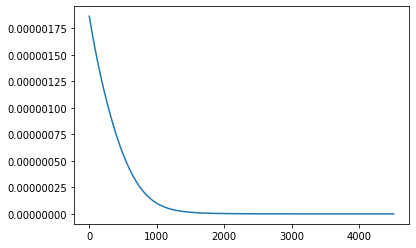

In [31]:
# the Gradient function for the gradient decent
def gradient (n, X, beta_hat, y):
    return (1/n)*(np.exp(beta_hat@X.T) @ X - y.T @ X)

#set the small random initial beta from a normal distribution with standard deviation of 0.0005 and mean of 0
beta_hat = np.random.normal(0,0.0005,p)

tolerance = 1e-11
learnrate = 1e-3

errors =[]
error = 1e100
 
while error > tolerance:
    _beta_hat = beta_hat - learnrate*gradient(n = n,X = X, beta_hat = beta_hat, y = y)
    error = np.sum((_beta_hat - beta_hat)**2)
    beta_hat = _beta_hat 
    errors += [error]

plt.plot(errors)

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$. Notice that we can write this as 
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where 

1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.

2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?

3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).

4. (Challenge) Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.

## My Answers to Exercise 2

### * Exercise 2.1

### * Exercise 2.2

### * Exercise 2.3

### * Exercise 2.4

__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).
2. Train and tune ridge regression using a validation set and compute the test error (square error loss).
3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.
4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
4. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
5. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

In [1]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

In [2]:
import pickle
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

## My Answers to Exercise 3

In [3]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, lars_path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn.model_selection as CrossValidate

n_tr,p = X_tr.shape
n_te,p = X_te.shape

# standardizing the data
Scaler = StandardScaler()
Scaler.fit(X_tr)
X_tr_std = Scaler.transform(X_tr)
X_te_std = Scaler.transform(X_te)

### * Exercise 3.1

In [4]:
# in the sklearn LinearRegression api, With no Intercept
# Linear regression training loss
LinReg = LinearRegression(fit_intercept = False)
LinReg.fit(X_tr_std,y_tr)
mseOLS = metrics.mean_squared_error(y_te,LinReg.predict(X_te_std))
print("the MSE loss on the testing data set is = ", mseOLS)

the MSE loss on the testing data set is =  1.0595597914044377


### * Exercise 3.2

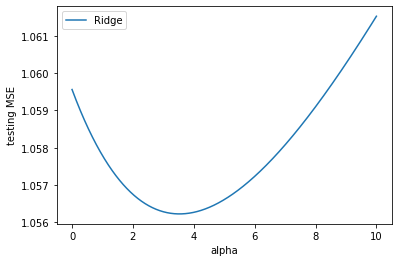

In [5]:
# Ridge regression sweeping over alpha training loss
ridgeModels = [Ridge(alpha = alpha, fit_intercept=False).fit(X_tr_std,y_tr) for alpha in np.arange(0, 10.001, 0.01)]
mseRidge = [metrics.mean_squared_error(y_te,m.predict(X_te_std)) for m in ridgeModels]

plt.plot(np.arange(0, 10.001, 0.01), mseRidge, label="Ridge")
plt.ylabel("testing MSE")
plt.xlabel("alpha")
plt.legend()

### * Exercise 3.3

n_iter =  102
lambda's size= (103,)
number of active variables= 100
size of the coefficients along the path= (100, 103)


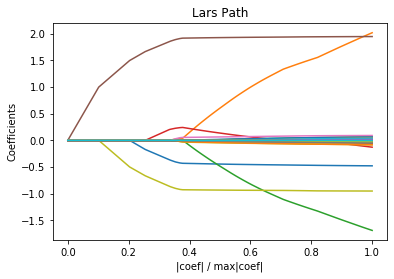

In [6]:
[lambdas, active, coefsLASSO, n_iter]=lars_path(X=X_tr_std, y=y_tr, method= 'lasso',verbose=0, return_n_iter=True)

print("n_iter = " ,n_iter)
print("lambda's size=" , lambdas.shape)
print ("number of active variables=", len(active))
print("size of the coefficients along the path=",coefsLASSO.shape)

plot_lars(coefsLASSO, lines=False, title="Lars Path")

MSE of prediction error on the testing dataset using the lars path with lasso mod
The minimum mse is = 1.0107886005863476 
The iteration with the minimum mse is 67


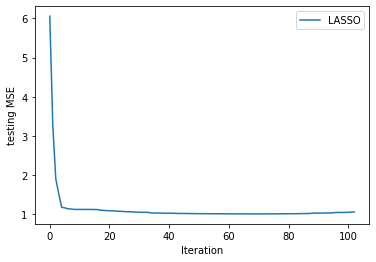

In [9]:
#now we find the prediction error on the test set for LARS with lasso modification
mseLASSO = [metrics.mean_squared_error(y_te,X_te_std @ coefsLASSO[:,i]) for i in range (0,n_iter+1)]

print("MSE of prediction error on the testing dataset using the lars path with lasso mod")

print ("The minimum mse is =", np.min(mseLASSO), "\nThe iteration with the minimum mse is", np.argmin(mseLASSO))

plt.plot(mseLASSO, label="LASSO")
plt.ylabel("testing MSE")
plt.xlabel("Iteration")
plt.legend()

### * Exercise 3.4

n_iter =  101
lambda's size= (102,)
number of active variables= 100
size of the coefficients along the path= (100, 102)


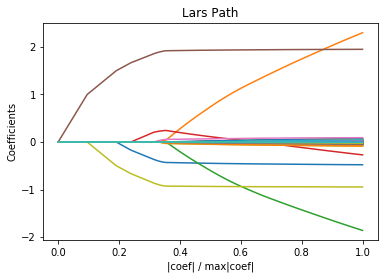

In [11]:
[lambdas, active, coefsLAR, n_iter]=lars_path(X=X_tr_std, y=y_tr, method= 'lar',verbose=0, return_n_iter=True)

print("n_iter = " ,n_iter)
print("lambda's size=" , lambdas.shape)
print ("number of active variables=", len(active))
print("size of the coefficients along the path=",coefsLAR.shape)

plot_lars(coefsLAR, lines=False, title="Lars Path")

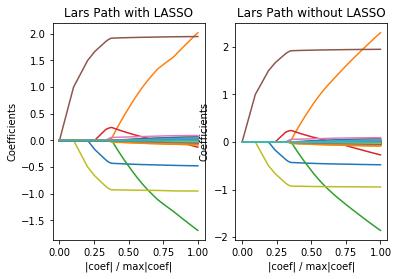

In [12]:
plt.subplot(121)
plot_lars(coefsLASSO, lines=False, title="Lars Path with LASSO")
plt.subplot(122)
plot_lars(coefsLAR, lines=False, title="Lars Path without LASSO")

As we can see here, they are both fairly similar. However in the LAR with Lasso modification, we have both the hitting and leaving events, meaning that the optimizer can and will add or remove coefficients at a given time. On the other hand, in LAR without the Lasso modifications we only have hitting events and the optimizer will continue to add coefficients until all of them are added in.

This discrepency is noticeable in the 2nd line from top (the orange line) in the above plots.

### * Exercise 3.5

In [14]:
# extracting the active set of coefficient indices for LAR with Lasso Modification
nonZeroCoefsLASSOidx = [[i for i, x in enumerate(coefsLASSO[:,j]) if x!=0] for j in range(0,n_iter+1)]
# extracting the active set of coefficient indices for LAR without Lasso Modification
nonZeroCoefsLARidx = [[i for i, x in enumerate(coefsLAR[:,j]) if x!=0] for j in range(0,n_iter+1)]

No coefficient is selected at iteration 0
The minimum mse is = 1.0001867127116024 
The iteration with the minimum mse is 21


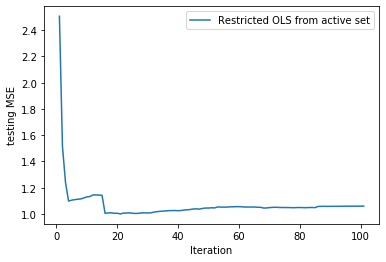

In [16]:
#for all the iterations, we select the columns from X with predictors that are inside the active set and fit on the training set on the smaller restricted X and test on the test set
mseLASSORst =[]
for j in range (0,n_iter+1):
    X_tr_std_rst = X_tr_std[:,nonZeroCoefsLASSOidx[j]]
    X_te_std_rst = X_te_std[:,nonZeroCoefsLASSOidx[j]]
    if len(nonZeroCoefsLASSOidx[j]) is 0:
        print("No coefficient is selected at iteration",j)
        mseLASSORst.append(np.NaN)
        continue
    LinReg = LinearRegression(fit_intercept = False).fit(X_tr_std_rst,y_tr)
    mseLASSORst.append(metrics.mean_squared_error(y_te,LinReg.predict(X_te_std_rst)))

#ignoring the nan to find the minimum
print ("The minimum mse is =", np.nanmin(mseLASSORst), "\nThe iteration with the minimum mse is", np.nanargmin(mseLASSORst))
    
_=plt.plot(mseLASSORst, label="Restricted OLS from active set")
_=plt.ylabel("testing MSE")
_=plt.xlabel("Iteration")
_=plt.legend()

The minimum mse in the restricted OLS is = 1.0001867127116024 
The  iteration with the minimum mse is 21 and the selected predictors are 
 [0, 1, 2, 3, 5, 8, 27, 38, 46, 50, 52, 53, 68, 69, 76, 77, 78, 80, 91, 96, 97]



The minimum mse in LASSO is = 1.0107886005863476 The iteration with the minimum mse is 67 and the selected predictors are 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 19, 20, 24, 26, 27, 29, 31, 35, 36, 38, 39, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 56, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 85, 86, 88, 89, 90, 91, 94, 95, 96, 97, 98]
[5]


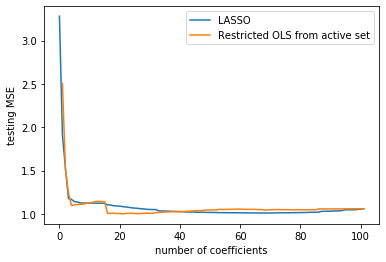

In [18]:
# comparing the results from Lasso and OLS with restricted X. Ignoring the 0th iteration
_=plt.plot(mseLASSO[1:], label="LASSO")
_=plt.plot(mseLASSORst, label="Restricted OLS from active set")
_=plt.ylabel("testing MSE")
_=plt.xlabel("number of coefficients")
_=plt.legend()


print ("The minimum mse in the restricted OLS is =", np.nanmin(mseLASSORst), "\nThe  iteration with the minimum mse is", np.nanargmin(mseLASSORst), "and the selected predictors are \n", nonZeroCoefsLASSOidx[np.nanargmin(mseLASSORst)])
print("\n\n")
print ("The minimum mse in LASSO is =", np.min(mseLASSO), "The iteration with the minimum mse is", np.argmin(mseLASSO), "and the selected predictors are \n", nonZeroCoefsLASSOidx[np.argmin(mseLASSO)])

print(nonZeroCoefsLASSOidx[1])

### * Exercise 3.6

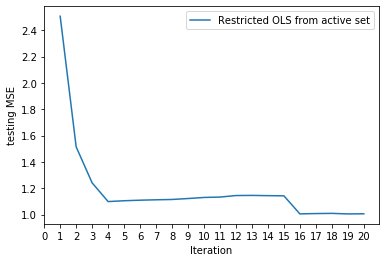

In [20]:
_=plt.plot(mseLASSORst[:21], label="Restricted OLS from active set")
_=plt.ylabel("testing MSE")
_=plt.xlabel("Iteration")
_=plt.xticks(np.arange(0,21,1))
_=plt.legend()

As we can see in the zoomed MSE plot for the restricted OLS, a very efficient model can be designed by only using 4 predictors. The MSE for this model and the selected predictors are described below:

In [21]:
print ("The mse for the small model with 4 coefficients is",mseLASSORst[4],"\nThe selected predictors for the small model with 4 coefficeints are \n", nonZeroCoefsLASSOidx[4])

The mse for the small model with 4 coefficients is 1.0984533993511019 
The selected predictors for the small model with 4 coefficeints are 
 [0, 3, 5, 8]


However if we can afford to have a larger and a bit slower model, there is no problem with going for the model with 21 predictors. The properties for this model is described below:


In [22]:
print ("The mse for the best model with 21 coefficients is",mseLASSORst[21],"\nThe selected predictors for the best model with 21 coefficeints are \n", nonZeroCoefsLASSOidx[21])

The mse for the best model with 21 coefficients is 1.0001867127116024 
The selected predictors for the best model with 21 coefficeints are 
 [0, 1, 2, 3, 5, 8, 27, 38, 46, 50, 52, 53, 68, 69, 76, 77, 78, 80, 91, 96, 97]


I would prefer the model with 4 predictos, because for only 4 predictors the performance is great and is well optimized. 